#Assignment

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터셋 로드
df = pd.read_csv("/content/drive/MyDrive/ML/lecture/cancer_reg.csv")

# feature와 target 분리
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

In [22]:
# 정규화(MinMaxScaler)
scaler_M = MinMaxScaler()
X_normal = scaler_M.fit_transform(X)

# 정규화 (z-score)
scaler_z = StandardScaler()
X_scaled = scaler_z.fit_transform(X)

In [23]:
# 데이터셋 분할
train_size=0.8  #train 0.8, eval 0.1, test 0.1
X_train, X_rem, y_train, y_rem = train_test_split(X_normal,y,train_size=0.8)  #X_normal(MinMax) vs X_scaled(z-score)
X_eval, X_test, y_eval, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# print(X_train.shape), print(y_train.shape)
# print(X_eval.shape), print(y_eval.shape)
# print(X_test.shape), print(y_test.shape)

In [24]:
# # 데이터셋 분할
# train_size=0.8  #train 0.8, eval 0.1, test 0.1
# X_train, X_rem, y_train, y_rem = train_test_split(X_scaled,y,train_size=0.8)  #X_normal(MinMax) vs X_scaled(z-score)
# X_eval, X_test, y_eval, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [25]:
# Ridge Regression 모델 ##학습##
model_ridge = Ridge(alpha=0.1)  ###### L2 regularization alpha 값 설정할 것
model_ridge.fit(X_train, y_train)

# evaluation 데이터에 대한 예측
y_eval_pred = model_ridge.predict(X_eval)
eval_rmse = mean_squared_error(y_eval, y_eval_pred, squared=False)
eval_r2 = r2_score(y_eval, y_eval_pred)
print("evaluation RMSE Score:", eval_rmse)
print("evaluation R2 Score:", eval_r2)
print("\n")
# train 데이터에 대한 예측
y_train_pred = model_ridge.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print("train RMSE Score:", train_rmse)
print("train R2 Score:", train_r2)
print("\n")
# test 데이터에 대한 예측
y_test_pred = model_ridge.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
print("test RMSE Score:", rmse)
print("test R2 Score:", r2)

evaluation RMSE Score: 17.203235309465914
evaluation R2 Score: 0.5891281446074008


train RMSE Score: 19.248191811275788
train R2 Score: 0.51685063417686


test RMSE Score: 21.538782942836267
test R2 Score: 0.4495133635369716


In [26]:
# 학습된 Weight 값 확인
weights = model_ridge.coef_
feature_names = X.columns
feature_weights = pd.Series(weights, index=feature_names)
print("Weight 값:\n", feature_weights)

Weight 값:
 avgAnnCount              -109.085404
avgDeathsPerYear          128.982552
incidenceRate             190.448285
medIncome                   3.831026
popEst2015                -44.144665
povertyPercent             23.541178
studyPerCap                -0.115431
MedianAge                  -4.001361
MedianAgeMale             -13.227141
MedianAgeFemale            -7.532328
AvgHouseholdSize            2.142166
PercentMarried             38.287192
PctNoHS18_24               -4.577965
PctHS18_24                 17.920618
PctBachDeg18_24            -6.692291
PctHS25_Over               18.103022
PctBachDeg25_Over         -47.808986
PctUnemployed16_Over       12.957597
PctPrivateCoverage        -29.066891
PctEmpPrivCoverage         17.058834
PctPublicCoverage          -5.782559
PctPublicCoverageAlone     13.556485
PctWhite                   -5.956019
PctBlack                   -1.773812
PctAsian                    4.342635
PctOtherRace              -33.953150
PctMarriedHouseholds      -

In [27]:
feature_weights = pd.Series(weights, index=feature_names).sort_values(ascending=False)
print("Weight 값:\n", feature_weights)

Weight 값:
 incidenceRate             190.448285
avgDeathsPerYear          128.982552
PercentMarried             38.287192
povertyPercent             23.541178
PctHS25_Over               18.103022
PctHS18_24                 17.920618
PctEmpPrivCoverage         17.058834
PctPublicCoverageAlone     13.556485
PctUnemployed16_Over       12.957597
PctAsian                    4.342635
medIncome                   3.831026
AvgHouseholdSize            2.142166
studyPerCap                -0.115431
PctBlack                   -1.773812
MedianAge                  -4.001361
PctNoHS18_24               -4.577965
PctPublicCoverage          -5.782559
PctWhite                   -5.956019
PctBachDeg18_24            -6.692291
MedianAgeFemale            -7.532328
MedianAgeMale             -13.227141
BirthRate                 -22.100912
PctPrivateCoverage        -29.066891
PctOtherRace              -33.953150
popEst2015                -44.144665
PctMarriedHouseholds      -45.473791
PctBachDeg25_Over         -

In [28]:
# Grid Search를 통한 L2 Regularization alpha 값 탐색
alphas = [0.001, 0.01, 0.1, 0, 1, 10, 100]
best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    # Linear Regression 모델 학습
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)

    y_eval_pred = model_ridge.predict(X_eval)
    eval_rmse = mean_squared_error(y_eval, y_eval_pred, squared=False)
    eval_r2 = r2_score(y_eval, y_eval_pred)

    # 최적의 alpha 값
    if eval_rmse < best_rmse:
        best_rmse = eval_rmse
        best_alpha = alpha

In [29]:
# 최적의 alpha 값을 사용하여 모델 ##재학습##
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train, y_train)
model = model_ridge

In [30]:
# 학습된 Weight 값 확인
weights = model_ridge.coef_
feature_names = X.columns
feature_weights = pd.Series(weights, index=feature_names)

In [31]:
feature_weights = pd.Series(weights, index=feature_names).sort_values(ascending=False)

In [32]:
# 데이터에 대한 예측
y_pred = model.predict(X_eval)

# 평가 지표 계산
rmse = mean_squared_error(y_eval, y_pred, squared=False)
r2 = r2_score(y_eval, y_pred)

print("Best alpha:", best_alpha)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Weight 값:\n", feature_weights)

Best alpha: 0.1
RMSE: 17.203235309465914
R2 Score: 0.5891281446074008
Weight 값:
 incidenceRate             190.448285
avgDeathsPerYear          128.982552
PercentMarried             38.287192
povertyPercent             23.541178
PctHS25_Over               18.103022
PctHS18_24                 17.920618
PctEmpPrivCoverage         17.058834
PctPublicCoverageAlone     13.556485
PctUnemployed16_Over       12.957597
PctAsian                    4.342635
medIncome                   3.831026
AvgHouseholdSize            2.142166
studyPerCap                -0.115431
PctBlack                   -1.773812
MedianAge                  -4.001361
PctNoHS18_24               -4.577965
PctPublicCoverage          -5.782559
PctWhite                   -5.956019
PctBachDeg18_24            -6.692291
MedianAgeFemale            -7.532328
MedianAgeMale             -13.227141
BirthRate                 -22.100912
PctPrivateCoverage        -29.066891
PctOtherRace              -33.953150
popEst2015                -44.1

avgAnnCount: -109.08540444255313
avgDeathsPerYear: 128.98255171927755
incidenceRate: 190.44828468676354
medIncome: 3.831026197044804
popEst2015: -44.144664558744445
povertyPercent: 23.541177609287196
studyPerCap: -0.1154311451577959
MedianAge: -4.00136063051891
MedianAgeMale: -13.227140765348821
MedianAgeFemale: -7.532327524197032
AvgHouseholdSize: 2.1421664256675714
PercentMarried: 38.287192394472605
PctNoHS18_24: -4.577965173793506
PctHS18_24: 17.92061828047965
PctBachDeg18_24: -6.692291279551993
PctHS25_Over: 18.10302160579066
PctBachDeg25_Over: -47.80898638774677
PctUnemployed16_Over: 12.957596785151328
PctPrivateCoverage: -29.066891133748715
PctEmpPrivCoverage: 17.05883431053536
PctPublicCoverage: -5.7825594691904945
PctPublicCoverageAlone: 13.556484807338622
PctWhite: -5.956019021825609
PctBlack: -1.773812415333299
PctAsian: 4.342635211383944
PctOtherRace: -33.95314954918247
PctMarriedHouseholds: -45.473791295759526
BirthRate: -22.100911954084264


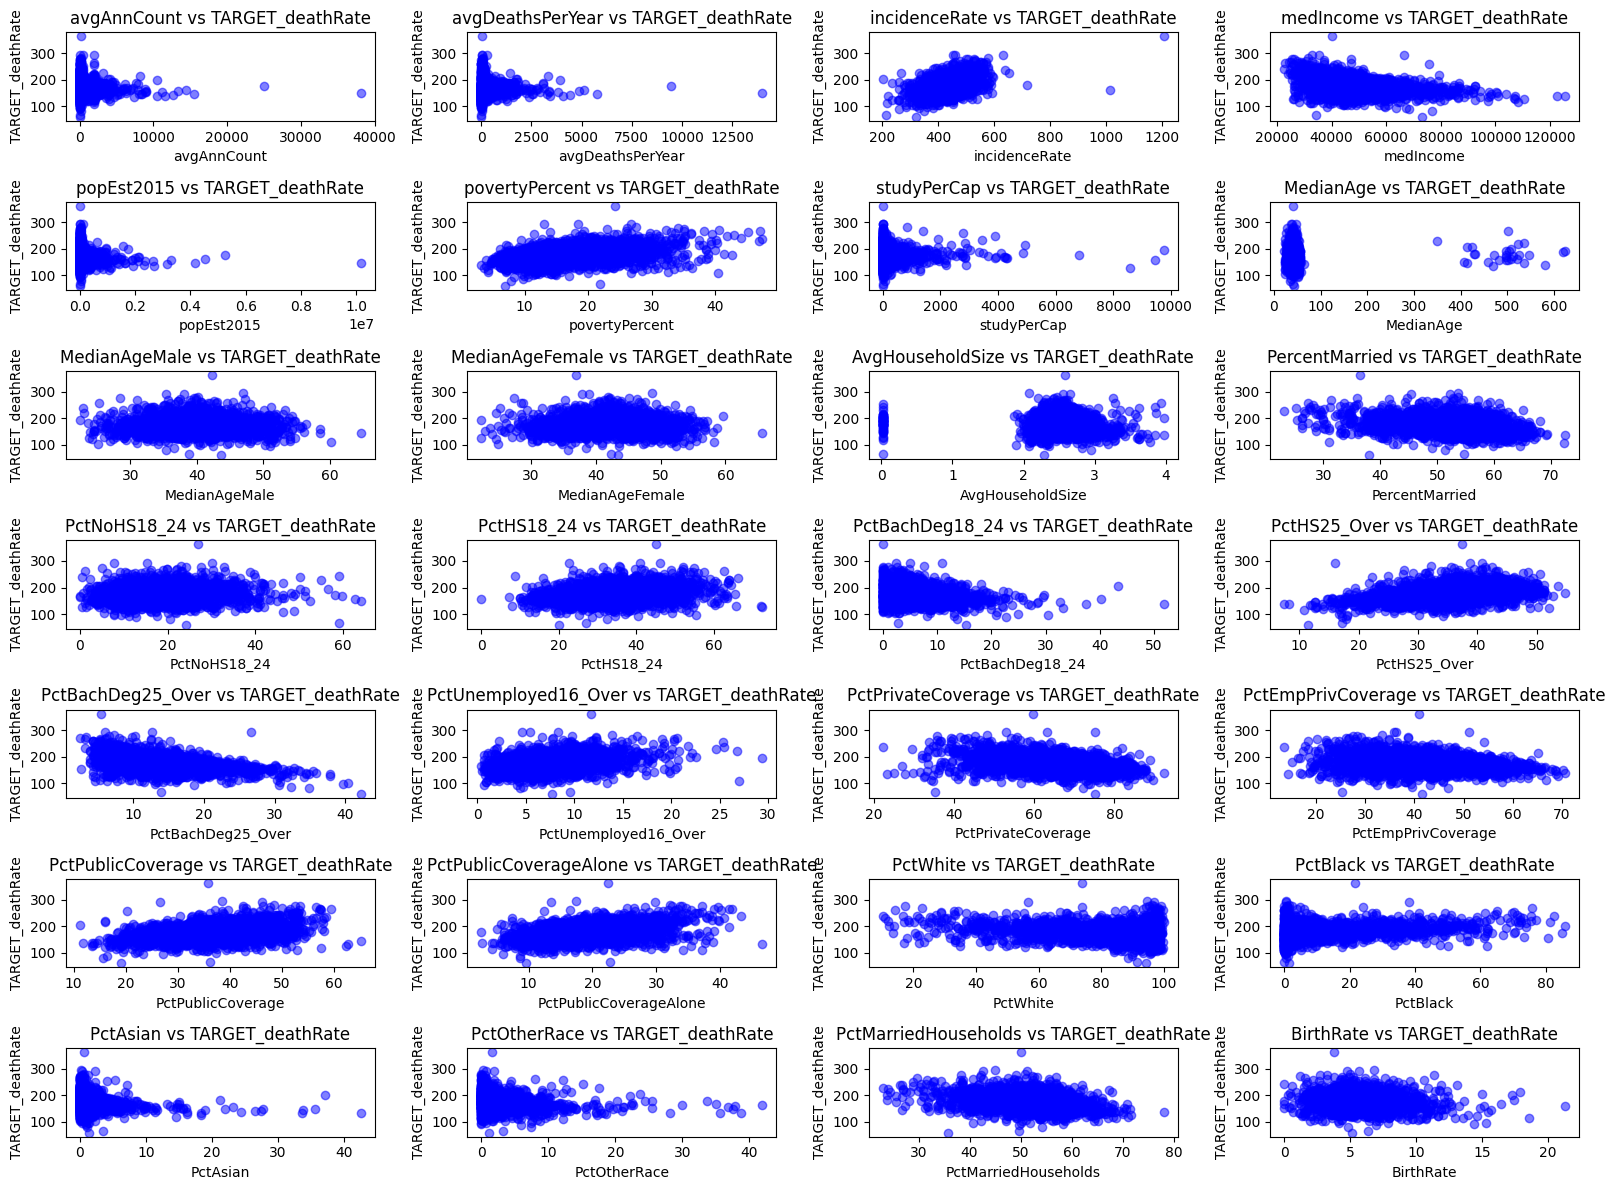

In [33]:
# Get the weight values
weights = model.coef_
feature_names = X.columns

# Print the weight values
for feature, weight in zip(feature_names, weights):
    print(f"{feature}: {weight}")

# Create scatter plots to visualize the relationship between each feature and TARGET_deathRate
num_features = len(feature_names)
num_cols = 4
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

for i, ax in enumerate(axes.flatten()):
    if i < num_features:
        feature = feature_names[i]
        ax.scatter(X[feature], y, color='b', alpha=0.5)
        ax.set_xlabel(feature)
        ax.set_ylabel('TARGET_deathRate')
        ax.set_title(f'{feature} vs TARGET_deathRate')

plt.tight_layout()
plt.show()

In [34]:
y_pred

array([200.94267802, 196.61918948, 161.8062019 , 170.5869829 ,
       189.01770159, 164.76956253, 152.60227813, 151.82581172,
       202.17977414, 182.20585228, 180.3614823 , 199.0182531 ,
       174.45881893, 174.65634641, 195.97040963, 189.07074781,
       164.83167342, 182.12580267, 187.12805128, 195.99730645,
       181.22302221, 179.99854111, 191.0813555 , 178.44945876,
       183.44261299, 174.14320741, 170.82483244, 197.24387595,
       170.23807501, 194.41861511, 179.99718394, 156.96912162,
       183.0046183 , 138.89971541, 221.73505102, 185.77816891,
       189.96917416, 168.06076796, 176.26029139, 200.5345246 ,
       139.08998471, 201.61630991, 155.18197693, 173.93880967,
       193.58572397, 127.54798718, 183.60749226, 177.21133967,
       224.88278454, 164.81470749, 183.30842782, 172.52217861,
       183.80930334, 158.45533093, 153.85012291, 159.2099655 ,
       187.99838369, 169.12599337, 203.211355  , 164.04238747,
       196.93780233, 184.24658894, 172.90921541, 144.20

In [35]:
# 10회 반복 실행
num = 10
rmse_scores = []
r2_scores = []
weights_sum = np.zeros(df.shape[1] - 1)

for i in range(num):
    # 데이터셋을 무작위로 섞음
    shuffled_data = df.sample(frac=1, random_state=i)

    # feature와 target 분리
    X = shuffled_data.drop(columns=['TARGET_deathRate'])
    y = shuffled_data['TARGET_deathRate']

    # 정규화(MinMaxScaler)
    scaler_M = MinMaxScaler()
    X_normal = scaler_M.fit_transform(X)

    # 데이터셋 분할
    train_size=0.8  #train 0.8, eval 0.1, test 0.1
    X_train, X_rem, y_train, y_rem = train_test_split(X_normal,y,train_size=0.8)  #X_normal(MinMax) vs X_scaled(z-score)
    X_eval, X_test, y_eval, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
    
    # Linear Regression 모델 ##학습##
    model = Ridge(alpha=best_alpha)  # L2 Regularization을 적용한 Linear Regression 모델
    model.fit(X_train, y_train)

    # 데이터에 대한 예측
    y_pred = model.predict(X_eval)

    # 평가 지표 계산
    rmse = mean_squared_error(y_eval, y_pred, squared=False)
    r2 = r2_score(y_eval, y_pred)

    # 결과 저장
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    weights_sum += model.coef_

# 평가 결과 및 학습된 가중치 값의 평균 출력
print("RMSE 평균:", np.mean(rmse_scores))
print("R2 Score 평균:", np.mean(r2_scores))
print("Weight 평균:\n", weights_sum / num)


RMSE 평균: 19.637673062173484
R2 Score 평균: 0.4980756570844386
Weight 평균:
 [-90.85331129 110.28154268 194.99758674   7.83616956 -38.30727763
  24.20745607  -3.60249147  -2.28133549 -18.46493357  -0.96619327
   2.43474142  37.25598167  -6.44552065  17.29583768  -5.42577326
  19.15249891 -46.96592738  11.67460495 -32.59425193  15.94212026
   1.73876132   3.72071633  -8.75930734  -3.13633052   1.55163145
 -37.90857226 -45.2203393  -19.86998778]


In [36]:
relevance = weights_sum / num

# 시각화를 위한 통계 및 가중치 추출
statistics = [statistic for statistic, _ in relevance]
weights = [weight for _, weight in relevance]

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.bar(statistics, weights)
plt.xlabel('Statistic')
plt.ylabel('Weight')
plt.title('Relevance of each statistic to TARGET_deathRate')
plt.xticks(rotation=90)
plt.show()

TypeError: ignored

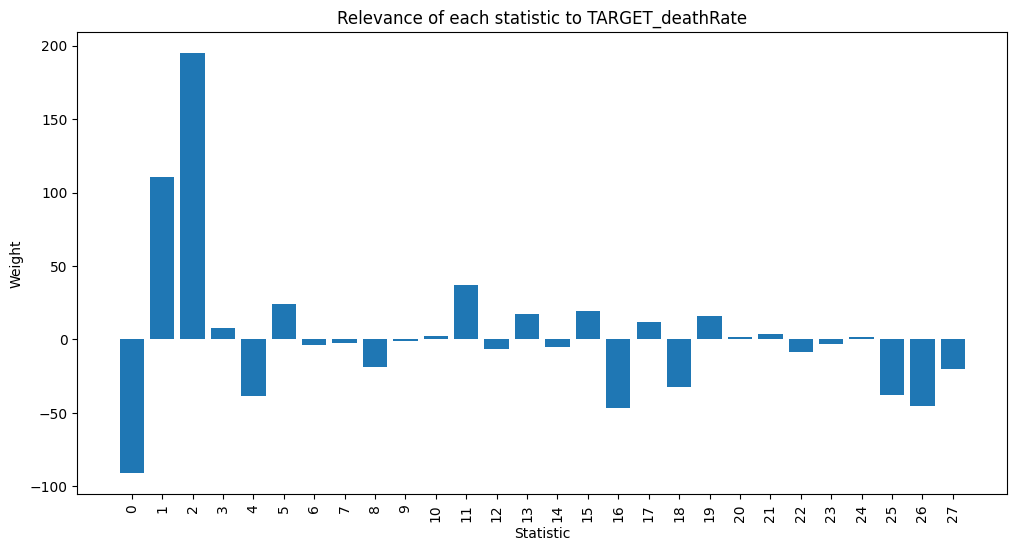

In [40]:
# Extract weights for visualization
relevance = weights_sum / num
weights = relevance

# Create a list of statistics for labeling the x-axis
statistics = [statistic for statistic, _ in enumerate(weights)]


# Result visualization
plt.figure(figsize=(12, 6))
plt.bar(statistics, weights)
plt.xlabel('Statistic')
plt.ylabel('Weight')
plt.title('Relevance of each statistic to TARGET_deathRate')
plt.xticks(statistics, rotation=90)
plt.show()


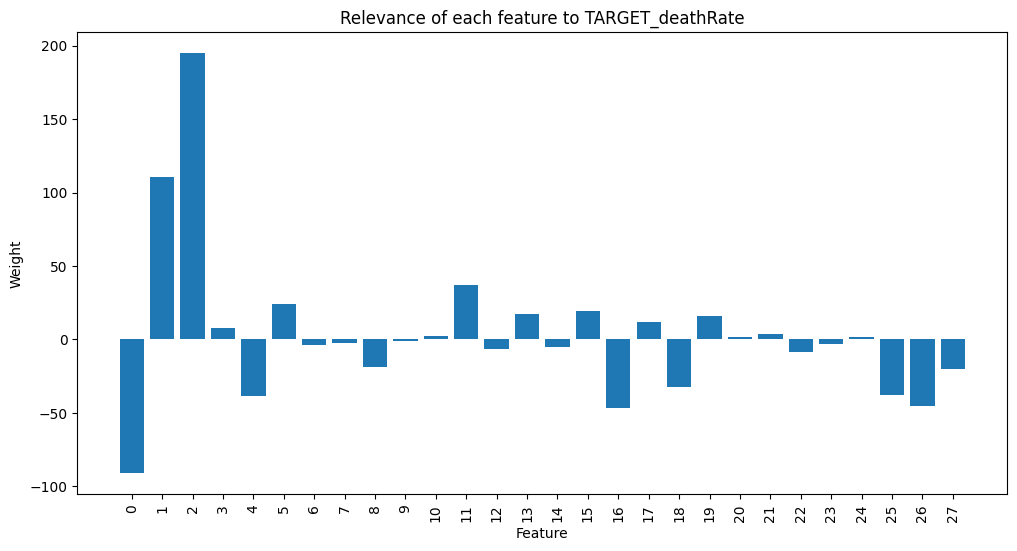

In [44]:
feature_names = list(range(28))

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(feature_names, weights)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Relevance of each feature to TARGET_deathRate')
plt.xticks(feature_names, rotation=90)
plt.show()

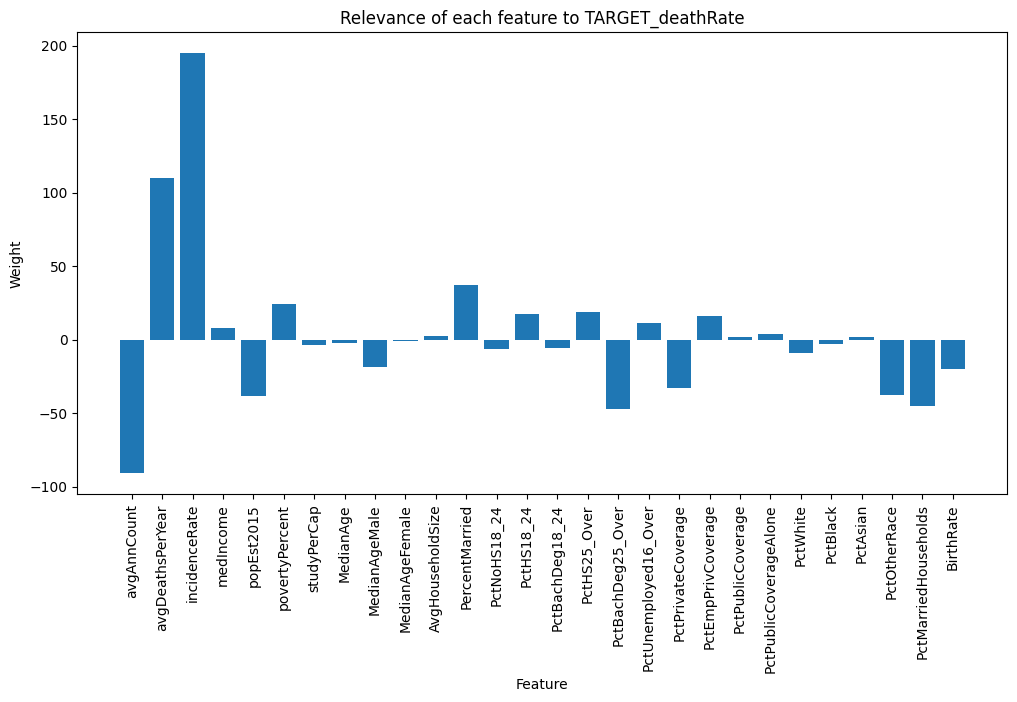

In [46]:
feature_names = df.columns[:-1]  # Exclude the last column (TARGET_deathRate)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(feature_names, weights)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Relevance of each feature to TARGET_deathRate')
plt.xticks(rotation=90)
plt.show()

#데이터셋 분석

In [ ]:
import seaborn as sns

In [ ]:
df.shape

(3047, 29)

In [ ]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   incidenceRate           3047 non-null   float64
 3   medIncome               3047 non-null   int64  
 4   popEst2015              3047 non-null   int64  
 5   povertyPercent          3047 non-null   float64
 6   studyPerCap             3047 non-null   float64
 7   MedianAge               3047 non-null   float64
 8   MedianAgeMale           3047 non-null   float64
 9   MedianAgeFemale         3047 non-null   float64
 10  AvgHouseholdSize        3047 non-null   float64
 11  PercentMarried          3047 non-null   float64
 12  PctNoHS18_24            3047 non-null   float64
 13  PctHS18_24              3047 non-null   float64
 14  PctBachDeg18_24         3047 non-null   

In [ ]:
#상관 관계 분석
df_corr = df.corr()
df_corr
#히트맵
plt.figure(figsize=(15, 15)) #이미지 크기
sns.set(font_scale=0.8)     #폰트 스케일
sns.heatmap(df_corr, annot=True, cbar = True, cmap='Reds')  #annot 값 표시, cbar 오른쪽 바, cmap는 색깔
plt.show()

In [ ]:
corr_order = df.corr().loc[:'BirthRate', 'TARGET_deathRate'].abs().sort_values(ascending=False)
corr_order

PctBachDeg25_Over         0.485477
incidenceRate             0.449432
PctPublicCoverageAlone    0.449358
povertyPercent            0.429389
medIncome                 0.428615
PctHS25_Over              0.404589
PctPublicCoverage         0.404572
PctPrivateCoverage        0.386066
PctUnemployed16_Over      0.378412
PctMarriedHouseholds      0.293325
PctBachDeg18_24           0.287817
PctEmpPrivCoverage        0.267399
PercentMarried            0.266820
PctHS18_24                0.261976
PctBlack                  0.257024
PctOtherRace              0.189894
PctAsian                  0.186331
PctWhite                  0.177400
avgAnnCount               0.143532
popEst2015                0.120073
avgDeathsPerYear          0.090715
PctNoHS18_24              0.088463
BirthRate                 0.087407
AvgHouseholdSize          0.036905
studyPerCap               0.022285
MedianAgeMale             0.021929
MedianAgeFemale           0.012048
MedianAge                 0.004375
Name: TARGET_deathRa

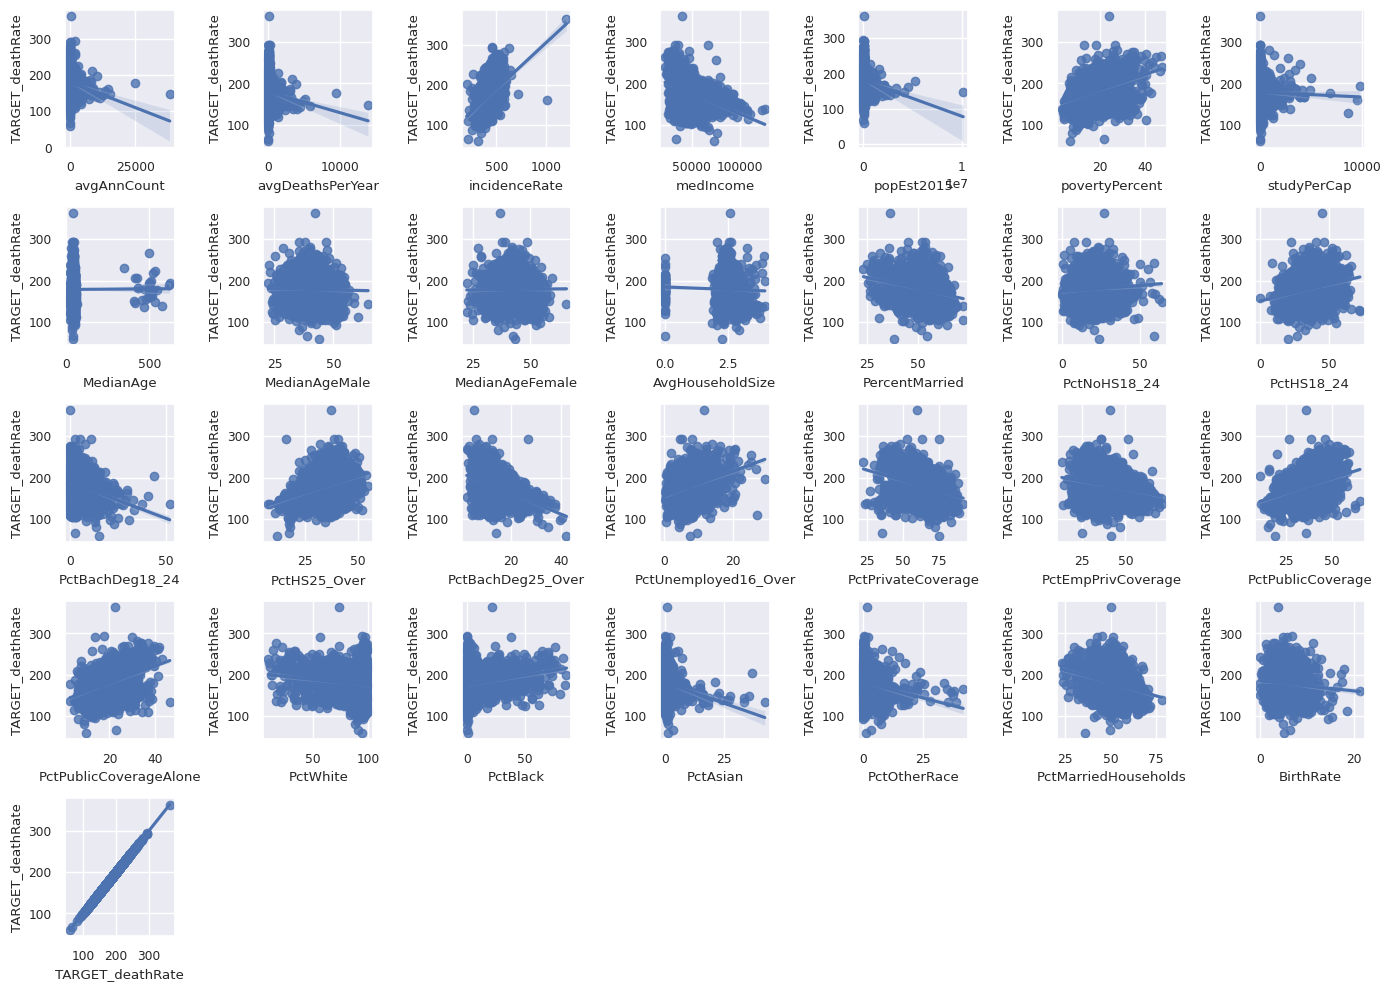

In [ ]:
#regplot으로 선형 회귀선 표시
plot_cols = df.columns
plot_df = df.loc[:, plot_cols]
num_plots = len(plot_cols)

num_rows = (num_plots + 6) // 7  # Number of rows in the subplot grid
num_cols = min(num_plots, 7)  # Number of columns in the subplot grid

plt.figure(figsize=(14, 2*num_rows))
for idx, col in enumerate(plot_cols[0:]):
    ax = plt.subplot(num_rows, num_cols, idx+1)
    sns.regplot(x=col, y=plot_cols[-1], data=plot_df, ax=ax)
plt.tight_layout()
plt.show()